# **K-means Clustering**
- Unspervised Learning _Algorithm_

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123)

In [3]:
# np.linspace(0, np.pi, 500) based on the number of points
theta = np.arange(0, np.pi, np.pi/500) # based on the step size

In [4]:
def add_noise(values, mean=0, std=0.1, size=None):
  '''
  size: number of samples(data points)
  inputs data points and renders noisy points
  '''
  size = size or len(values)
  noise = np.random.normal(mean, std, size)
  return values + noise

In [5]:
# semicircle (centered at (0, 0), facing downward)

semicircle1_x = add_noise(np.cos(theta))
semicircle1_y = add_noise(np.sin(theta))

In [6]:
# semicircle (centered at (1, 0), facing upward)

semicircle2_x = add_noise(1 + np.cos(theta))
semicircle2_y = add_noise(-np.sin(theta))

In [7]:
# list of point sets
d1 = [(x, y) for x, y in zip(semicircle1_x, semicircle1_y)]
d2 = [(x, y) for x, y in zip(semicircle2_x, semicircle2_y)]

In [8]:
data_points = d1 + d2

## *Semicircles* with Gaussian Noise




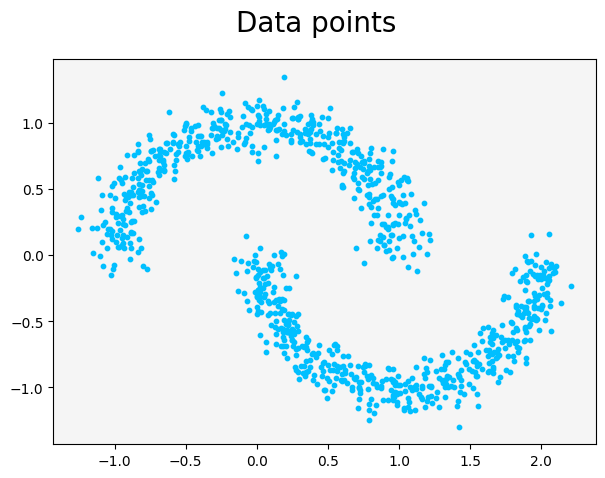

In [9]:
fig, ax = plt.subplots(figsize=(7, 5))
fig.suptitle('Data points', fontsize=20)
ax.scatter(semicircle1_x, semicircle1_y, s=10, color='deepskyblue')
ax.scatter(semicircle2_x, semicircle2_y, s=10, color='deepskyblue')
ax.set_facecolor('whitesmoke')
plt.show()

In [10]:
# select two, since k=2 (2 clusters), random centroids in the region [-2, 3] x [-2, 2]

C_1 = np.random.uniform(low=[-2, -2], high=[3, 2])
C_2 = np.random.uniform(low=[-2, -2], high=[3, 2])

In [11]:
mappings = {} # to store the cluster assignment
max_iters = 10000
current_iters = 0

In [12]:
# To visualize the clustering
def plot_clusters(C1, C2, mappings, iteration=None):

    cluster1 = [point for point, cluster in mappings.items() if cluster == 1]
    cluster2 = [point for point, cluster in mappings.items() if cluster == 2]

    # Unpacks list of (x, y) tuples into separate x and y coordinate lists
    x1, y1 = zip(*cluster1) if cluster1 else ([], [])
    x2, y2 = zip(*cluster2) if cluster2 else ([], [])

    plt.figure(figsize=(7, 5))
    plt.scatter(x1, y1, s=15, color='cyan', label='Cluster 1')
    plt.scatter(x2, y2, s=15, color='teal', label='Cluster 2')
    plt.title(f"K-Means Iteration {iteration}" if iteration else "K-Means Clustering Result")

    if iteration is not None:
        # plot the centroids
        plt.scatter([C1[0]], [C1[1]], color='crimson', marker='x', s=90, label='Centroid 1')
        plt.scatter([C2[0]], [C2[1]], color='gold', marker='x', s=90, label='Centroid 2')

    plt.legend()
    plt.gca().set_facecolor('whitesmoke')
    plt.grid(False)
    plt.show()

In [13]:
SHOW_PLOTS = False # can be toggled but since the iterations is enormously large in number, it is set as False

**K-means Algorithm**

In [14]:
from scipy.spatial.distance import cdist

## **cdist** computes the pairwise euclinean distances between two sets of points
-  It returns a list of distances, where each distance represents the length of the straight line connecting a point from the first set to a point in the second set. Mathematically, it calculates $||u-v||_2$ for every pair of points u and v , where u belongs to the first set and v belongs to the second set. These sets of points are 2D arrays.

In [15]:
while True:

    num_points_updated = 0
    current_iters += 1

    # Calculating the distances to both centroids at once and find the nearest centroid
    distances = cdist(data_points, [C_1, C_2])
    nearest_centroid = np.argmin(distances, axis=1) # row-wise min


    # Assign points to clusters, based on how close it is from the corresponding cluster's center
    for i, point in enumerate(data_points):

        new_cluster = nearest_centroid[i] + 1  # Add 1 for cluster labels 1 and 2

        # if it doesn't happen to be already assigned or the point has to be reassigned
        if point not in mappings or mappings[point] != new_cluster:

            mappings[point] = new_cluster
            num_points_updated += 1


    # cluster the points
    points_in_cluster1 = [point for point, cluster in mappings.items() if cluster == 1]
    points_in_cluster2 = [point for point, cluster in mappings.items() if cluster == 2]

    # Update the centroids as the mean of the cluster points
    if points_in_cluster1:
        C_1 = np.mean(points_in_cluster1, axis=0)
    if points_in_cluster2:
        C_2 = np.mean(points_in_cluster2, axis=0)

    # Visualize clustering at each iteration
    if SHOW_PLOTS:
        plot_clusters(C_1, C_2, mappings, current_iters)

    # Terminate if no points were reassigned or max iterations reached
    if num_points_updated == 0 and current_iters >= max_iters:
        break



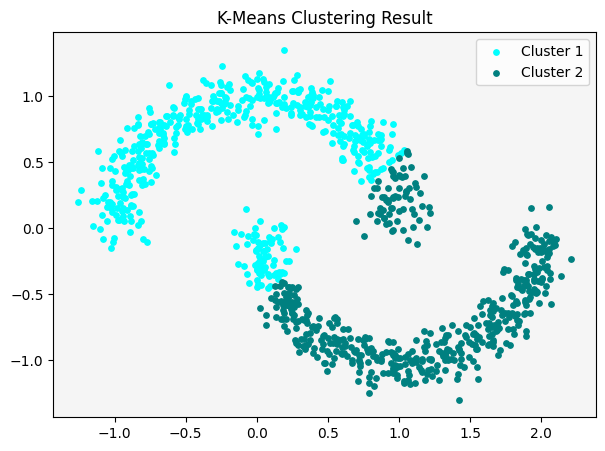

In [16]:
plot_clusters(C_1, C_2, mappings)

# **K-means++ Clustering**


In [17]:
from sklearn.datasets import fetch_covtype

In [18]:
data = fetch_covtype()

In [19]:
X_full = data['data']  # Shape (581012, 54)
y_full = data['target'] # Ground-truth labels

In [20]:
# Subsamples
rng = np.random.default_rng(seed=42) # random number generator
sample_indices = rng.choice(X_full.shape[0], size=20000, replace=False)

X_sub, y_sub = X_full[sample_indices], y_full[sample_indices]

In [21]:
NUM_QUANTITATIVE = 10

In [22]:
# Sepearate binary and quantitative features
quant_features = X_sub[:, :NUM_QUANTITATIVE]
binary_features = X_sub[:, NUM_QUANTITATIVE:]

In [23]:
# Standardize quantitative features (mean=0, std=1)
mean = np.mean(quant_features, axis=0)
std = np.std(quant_features, axis=0)

# # Prevent division by zero
epsilon = 1e-10
std = np.maximum(std, epsilon) # np.where(std==0, epsilon, std) or std[std==0] = epsilon

quant_scaled = (quant_features - mean) / std

In [24]:
X = np.hstack((quant_scaled, binary_features))

In [25]:
# To verify
print(f"X shape: {X.shape}")

X shape: (20000, 54)


In [26]:
def kmeans_plus_plus_init(X, k, rng=np.random.default_rng(None)):
  n_samples = X.shape[0]
  centroids = []

  # integers from 0 to n_samples-1
  # Choosing the first centroid
  first_centroid = rng.integers(n_samples)
  centroids.append(X[first_centroid])

  for _ in range(1, k):

    # Compute squared distance from each point to centroids and thus find the min across all centroids
    dists_squared = np.min(cdist(X, centroids, 'sqeuclidean'), axis=1)

    # Normalize
    # epsilon = 1e-10
    probs = dists_squared / np.sum(dists_squared)

    # Choosing the next centroid with probability proportional to squared distance
    next_centroid = rng.choice(n_samples, p=probs)
    centroids.append(X[next_centroid])

  return np.array(centroids)


In [27]:
class KMeans():
  def __init__(self, data, k, init='kmeans++', max_iters=500, rng=np.random.default_rng(None)):
    self.data = data
    self.k = k
    self.init = init
    self.max_iters = max_iters
    self.rng = rng

    # default cluster assignments for each data point
    self.assignment = [-1 for _ in range(len(data))]
    self.centroids = None


  def initialize_centroids(self):

    if self.init == 'random':
      centroids = self.rng.choice(range(len(self.data)), size=self.k, replace=False)  # randomly selecting k centroids
      return self.data[centroids]

    elif self.init == 'kmeans++':
      return kmeans_plus_plus_init(self.data, self.k, rng=self.rng)

    else:
      raise ValueError(f"Invalid initialization method ({self.init}) Choose 'random' or 'kmeans++'.")


  def assign_clusters(self, centers):

    # compute distance for each point from each center
    distances = cdist(self.data, centers)

    # assign the cluster, for which the center is nearest to the point
    new_assignments = np.argmin(distances, axis=1) # row-wise

    changed = not np.array_equal(new_assignments, self.assignment)
    self.assignment = new_assignments # update assignments

    return changed


  def update_centroids(self):

    new_centroids = []
    for j in range(self.k):

      # points in the data corresponding to its cluster
      points = self.data[self.assignment == j]

      if points.size > 0:
        # Average of all the points in the cluster
        new_centroids.append(np.mean(points, axis=0))
      else:
        # If it were to be the first center
        new_centroids.append(self.data[self.rng.choice(len(self.data))])

    return np.array(new_centroids)


  def fit(self):
    # k means algorithm
    centers = self.initialize_centroids()

    for _ in range(self.max_iters):
      changed = self.assign_clusters(centers)

      if not changed:
        # print(f"Converged after {_} iterations.")
        break # stop if the assignmnets aren't changed further

      centers = self.update_centroids()

    self.centroids = centers


  def wcss(self):
    # calculates the within-cluster sum of squares
    distances = cdist(self.data, self.centroids) # 2D

    # Get the distances to the assigned centroids
    cluster_distances = distances[np.arange(len(self.data)), self.assignment]

    return np.sum(cluster_distances ** 2)



In [28]:
k = 7
model_kpp = KMeans(data=X, k=k, init='kmeans++')

model_kpp.fit()
wcss_kpp = model_kpp.wcss()

model_rand = KMeans(data=X, k=k, init='random')
model_rand.fit()
wcss_rand = model_rand.wcss()

print(f"WC-SSD with K-Means++: {wcss_kpp}")
print(f"WC-SSD with Random Init: {wcss_rand}")

WC-SSD with K-Means++: 128158.15111406628
WC-SSD with Random Init: 129345.139985308


- **The K-means++ initialization resulted in a lower WC-SSD compared to random initialization, indicating that K-means++ finds more compact clusters.**


- **The reason behind this is K-means++ strategically selects initial centroids that are well-separated, leading to better clustering. The random initialization can lead to poor starting centroids and thus worse clustering.**

In [29]:
def run_multiple_kmeans(X, k_range, init_type='kmeans++', n_runs=10):
    avg_wcss = []
    for k in k_range:
        wcss_list = []
        for _ in range(n_runs):
            model = KMeans(data=X, k=k, init=init_type)
            model.fit()
            wcss_list.append(model.wcss())
        avg_wcss.append(np.mean(wcss_list))
    return avg_wcss

In [30]:
k_range = range(1, 21)
wcss_kpp = run_multiple_kmeans(X, k_range, init_type='kmeans++')
wcss_rand = run_multiple_kmeans(X, k_range, init_type='random')

**In the Elbow Method**, we plot WC-SSD for different K values
- WC-SSD measures cluster compactness, decreasing as K increases until diminishing returns are reached, resembling an "elbow" in the plot, where the corresponding K is a good estimate for the optimal number of clusters.

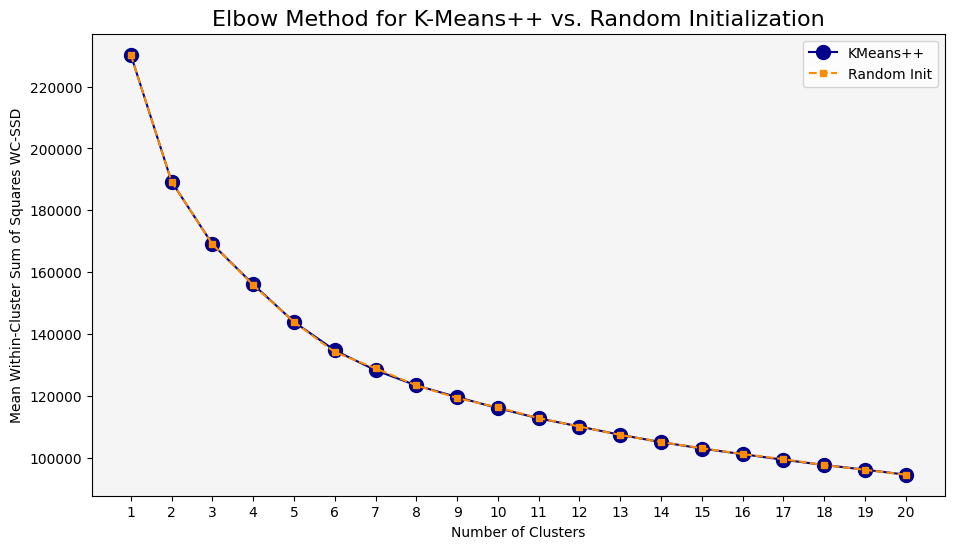

In [32]:
plt.figure(figsize=(11, 6))
plt.plot(k_range, wcss_kpp, color='darkblue', marker='o', markersize=10, label='KMeans++')
plt.plot(k_range, wcss_rand, color='darkorange', marker='s', markersize=5, linestyle='--', label='Random Init')
plt.xlabel('Number of Clusters')
plt.xticks(k_range)
plt.ylabel('Mean Within-Cluster Sum of Squares WC-SSD')
plt.title('Elbow Method for K-Means++ vs. Random Initialization', fontsize=16)
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('whitesmoke')
plt.show()

**The plot shows a sharp initial drop in WC-SSD up to K=6, beyond that it is diminishing.**
-  K-means++ more or less outperforms random initialization.  The elbow method, a heuristic approach, suggests K=6 or k=7 as a reasonable choice for the number of clusters.